In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
database_generated_path= rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/MPI_results/Stage3_99epochs/Database_Stage3_99epochs/DB_innerloop.npy"
# database_generated_path= rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/MPI_results/Stage3_99epochs/Database_Stage3_99epochs/DB_invalids_iter_5.npy"
xs_test_path = rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data_MPI/xs_test_MPI.npy"
ys_test_path = rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data_MPI/ys_test_MPI.npy"
xs_test = np.load(xs_test_path, allow_pickle=True)
ys_test = np.load(ys_test_path, allow_pickle=True)
generaed_db = np.load(file=database_generated_path, allow_pickle=True)
xs_generated = generaed_db["shapes"]
ys_generated = generaed_db["performance"][:,:2]
xs_generated.shape, ys_generated.shape , xs_test.shape, ys_test.shape

((822, 192, 2), (822, 2), (3875, 192, 2), (3875, 2))

## benchmark1: Cl, (CL/CD)  plot

In [3]:
def cl_cd_perfromance_plot(ys_generated, ys_test):
    EPS = 1e-8
    plt.figure(figsize=(6,6))
    plt.scatter(ys_test[:,0], ys_test[:,0]/(ys_test[:,1] + EPS), c='blue', alpha=0.3, label='Test Set')
    plt.scatter(ys_generated[:,0], ys_generated[:,0]/(ys_generated[:,1] + EPS),  c='red',  alpha=0.3, label='Generated')
    plt.title("Scatter of Predicted Performance (CL vs. CL/CD)")
    plt.xlabel("CL (real scale)")
    plt.ylabel("CL/CD (real scale)")
    plt.legend()
    plt.xlim((-0.1,0.5))
    plt.ylim((-15,60))
    plt.grid(True, alpha=0.3)
    plt.show()

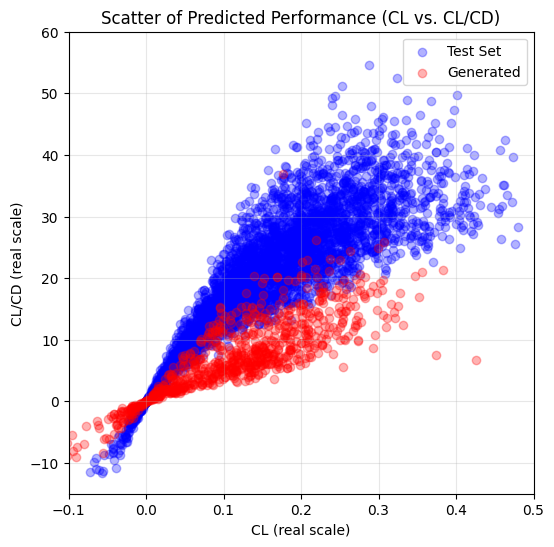

In [4]:
# database_generated_path= rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/Database/Database/DB_innerloop.npy"
# database_generated_path= rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/Database_definitelyStage3/Database_definitelyStage3/DB_innerloop.npy"
database_generated_path= rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/MPI_results/Stage3_99epochs/Database_Stage3_99epochs/DB_innerloop.npy"
xs_test_path = rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data_MPI/xs_test_MPI.npy"
ys_test_path = rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data_MPI/ys_test_MPI.npy"
xs_test = np.load(xs_test_path, allow_pickle=True)
ys_test = np.load(ys_test_path, allow_pickle=True)
generaed_db = np.load(file=database_generated_path, allow_pickle=True)
xs_generated = generaed_db["shapes"]
ys_generated = generaed_db["performance"][:,:2]
xs_generated.shape, ys_generated.shape , xs_test.shape, ys_test.shape
cl_cd_perfromance_plot(ys_generated, ys_test)

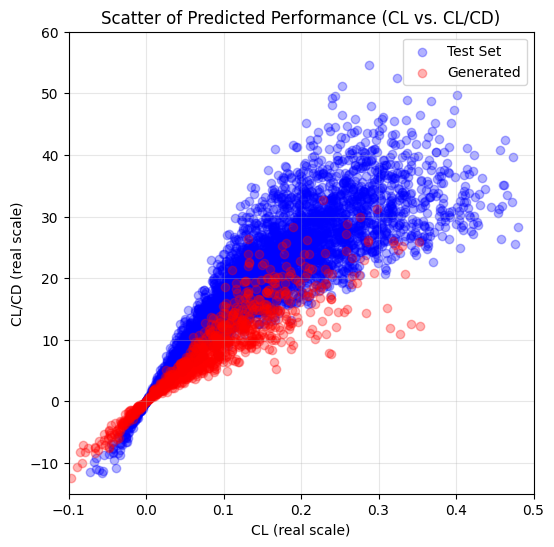

In [5]:
database_generated_path= rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/MPI_results/Database/Database/DB_innerloop.npy"
xs_test_path = rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data_MPI/xs_test_MPI.npy"
ys_test_path = rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/data_MPI/ys_test_MPI.npy"
xs_test = np.load(xs_test_path, allow_pickle=True)
ys_test = np.load(ys_test_path, allow_pickle=True)
generaed_db = np.load(file=database_generated_path, allow_pickle=True)
xs_generated = generaed_db["shapes"]
ys_generated = generaed_db["performance"][:,:2]
xs_generated.shape, ys_generated.shape , xs_test.shape, ys_test.shape
cl_cd_perfromance_plot(ys_generated, ys_test)

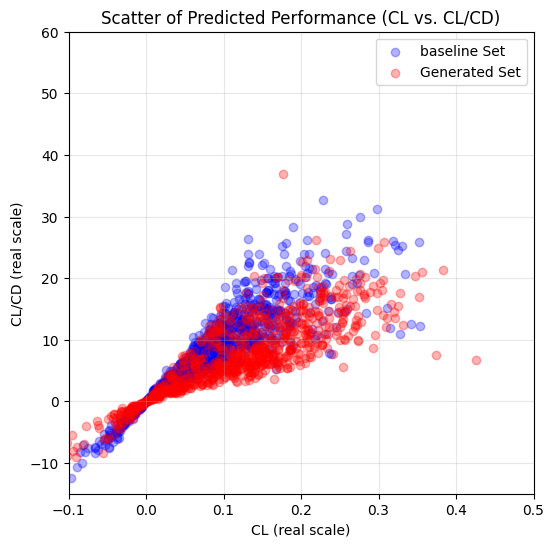

In [13]:
def cl_cd_perfromance_plot(ys_generated, ys_test):
    EPS = 1e-8
    plt.figure(figsize=(6,6))
    plt.scatter(ys_test[:,0], ys_test[:,0]/(ys_test[:,1] + EPS), c='blue', alpha=0.3, label='baseline Set')
    plt.scatter(ys_generated[:,0], ys_generated[:,0]/(ys_generated[:,1] + EPS),  c='red',  alpha=0.3, label='Generated Set')
    plt.title("Scatter of Predicted Performance (CL vs. CL/CD)")
    plt.xlabel("CL (real scale)")
    plt.ylabel("CL/CD (real scale)")
    plt.legend()
    plt.xlim((-0.1,0.5))
    plt.ylim((-15,60))
    plt.grid(True, alpha=0.3)
    plt.show()


database_generated_path= rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/MPI_results/Stage3_99epochs/Database_Stage3_99epochs/DB_innerloop.npy"
database_baseline_path= rf"/home/bardiya/projects/diffusion_air_manifolding/codes/creative-generativeai-diffusion/MPI_results/Database/Database/DB_innerloop.npy"
generaed_db = np.load(file=database_generated_path, allow_pickle=True)
baseline_db = np.load(file=database_baseline_path, allow_pickle=True)
xs_generated = generaed_db["shapes"]
ys_generated = generaed_db["performance"][:,:2]
xs_base = baseline_db["shapes"]
ys_base = baseline_db["performance"][:,:2]
cl_cd_perfromance_plot(ys_generated, ys_base)

In [9]:
import numpy as np

# -------------------------------
# Utilities
# -------------------------------

def _check_airfoil_batch(x, name="airfoils"):
    if not isinstance(x, np.ndarray):
        raise TypeError(f"{name} must be a numpy array")
    if x.ndim != 3 or x.shape[1:] != (192, 2):
        raise ValueError(f"{name} must have shape (batch, 192, 2); got {x.shape}")

def _batch_center_chord_normalize(airfoils, eps=1e-9):
    """
    Translate + scale each airfoil so chord spans ~[0, 1] in x.
    Keeps y in original units relative to chord length.
    """
    x = airfoils[..., 0]
    y = airfoils[..., 1]
    x_min = x.min(axis=1, keepdims=True)          # (N,1)
    x_max = x.max(axis=1, keepdims=True)
    chord = np.maximum(x_max - x_min, eps)        # avoid division by 0
    x_n = (x - x_min) / chord
    y_n = y / chord
    return np.stack([x_n, y_n], axis=-1)

# -------------------------------
# FID
# -------------------------------

def _symmetric_matrix_sqrt(mat, eps=1e-12):
    """
    Sqrt of a symmetric (semi-definite) matrix via eigen-decomposition.
    Returns a symmetric matrix closest to the principal sqrt.
    """
    vals, vecs = np.linalg.eigh(mat)
    vals_clamped = np.clip(vals, a_min=0.0, a_max=None)
    sqrt_vals = np.sqrt(vals_clamped + eps)
    return (vecs * sqrt_vals) @ vecs.T

def _frechet_distance(mu1, cov1, mu2, cov2, eps=1e-6):
    """
    Standard FID formula using a numerically stable covariance product sqrt.
    """
    diff = mu1 - mu2
    # Add eps * I to covariances for stability
    c1 = cov1 + np.eye(cov1.shape[0]) * eps
    c2 = cov2 + np.eye(cov2.shape[0]) * eps
    cov_prod_sqrt = _symmetric_matrix_sqrt(c1 @ c2)
    # If numerical issues leave tiny imaginary parts, drop them
    if np.iscomplexobj(cov_prod_sqrt):
        cov_prod_sqrt = cov_prod_sqrt.real
    fid = diff @ diff + np.trace(c1 + c2 - 2.0 * cov_prod_sqrt)
    return float(fid)

def compute_fid(
    real_airfoils, 
    gen_airfoils, 
    embed_fn, 
    normalize=True
):
    """
    Compute FID between real and generated airfoils.

    Parameters
    ----------
    real_airfoils : np.ndarray, shape (N_real, 192, 2)
    gen_airfoils  : np.ndarray, shape (N_gen, 192, 2)
    embed_fn      : callable(np.ndarray -> np.ndarray)
        Maps a batch of airfoils (N,192,2) to feature vectors of shape (N, D).
        Examples:
          - a learned encoder
          - CL/CD surrogate penultimate-layer features
          - handcrafted geometry/aero features
    normalize     : bool
        If True, chord-normalize each airfoil before embedding.

    Returns
    -------
    fid : float
    """
    _check_airfoil_batch(real_airfoils, "real_airfoils")
    _check_airfoil_batch(gen_airfoils, "gen_airfoils")

    R = _batch_center_chord_normalize(real_airfoils) if normalize else real_airfoils
    G = _batch_center_chord_normalize(gen_airfoils) if normalize else gen_airfoils

    # Extract features
    feat_real = embed_fn(R)  # (N_r, D)
    feat_gen  = embed_fn(G)  # (N_g, D)

    if not isinstance(feat_real, np.ndarray) or not isinstance(feat_gen, np.ndarray):
        raise TypeError("embed_fn must return numpy arrays")

    if feat_real.ndim != 2 or feat_gen.ndim != 2 or feat_real.shape[1] != feat_gen.shape[1]:
        raise ValueError(f"embed_fn must return (N,D) arrays with same D; got {feat_real.shape} vs {feat_gen.shape}")

    # Means & covariances
    mu_r = feat_real.mean(axis=0)
    mu_g = feat_gen.mean(axis=0)
    # rowvar=False => columns are variables/features
    cov_r = np.cov(feat_real, rowvar=False)
    cov_g = np.cov(feat_gen, rowvar=False)

    return _frechet_distance(mu_r, cov_r, mu_g, cov_g)


def example_embed_fn(airfoils):
    """
    Example (toy) embedding:
    - concatenate simple global shape descriptors
    Replace with your learned encoder / penultimate features.
    """
    # airfoils: (N,192,2)
    x = airfoils[..., 0]
    y = airfoils[..., 1]
    # Simple handcrafted features (toy):
    # thickness ~ max(y_upper - y_lower) approximated by peak-to-peak in y
    y_ptp = y.ptp(axis=1)                          # (N,)
    # camber proxy: mean y
    y_mean = y.mean(axis=1)                        # (N,)
    # area proxy via trapezoid in x
    # sort by x along chord per profile to make trapz meaningful
    x_sorted_idx = np.argsort(x, axis=1)
    x_s = np.take_along_axis(x, x_sorted_idx, axis=1)
    y_s = np.take_along_axis(y, x_sorted_idx, axis=1)
    area = np.trapz(y_s, x_s, axis=1)              # (N,)

    # pairwise roughness proxy: std of finite differences in y along chord
    dy = np.diff(y_s, axis=1)
    rough = dy.std(axis=1)

    feats = np.stack([y_ptp, y_mean, area, rough], axis=1)  # (N,4)
    return feats
# -------------------------------
# Minimal usage
# -------------------------------

import numpy as np

# -----------------------------
# Preprocessing (recommended)
# -----------------------------
def chord_normalize(batch, eps=1e-9):
    """
    Translate + scale each airfoil so chord spans ~[0,1] in x, and y is scaled by chord.
    batch: (N, 192, 2)
    """
    x = batch[..., 0]
    y = batch[..., 1]
    x_min = x.min(axis=1, keepdims=True)
    x_max = x.max(axis=1, keepdims=True)
    chord = np.maximum(x_max - x_min, eps)
    xn = (x - x_min) / chord
    yn = y / chord
    return np.stack([xn, yn], axis=-1)

# -----------------------------
# Core Chamfer distance
# -----------------------------
def chamfer_symmetric(a, b):
    """
    Symmetric Chamfer distance between two point sets a,b (192,2).
    Uses mean of squared distances to nearest neighbor in each direction.
    """
    a = np.asarray(a); b = np.asarray(b)
    # pairwise squared distances: (Na, Nb)
    # Na=Nb=192 here
    d2 = (
        (a[:, None, 0] - b[None, :, 0]) ** 2
        + (a[:, None, 1] - b[None, :, 1]) ** 2
    )
    # forward: each point in a -> nearest in b
    d_fw = d2.min(axis=1).mean()
    # backward: each point in b -> nearest in a
    d_bw = d2.min(axis=0).mean()
    return float(d_fw + d_bw)

def chamfer_batch_pairwise(X, Y, normalize=True):
    """
    Compute Chamfer(X[i], Y[i]) for each i.
    X: (N,192,2), Y: (N,192,2)
    Returns: (N,) distances
    """
    assert X.shape == Y.shape and X.ndim == 3 and X.shape[1:] == (192,2)
    A = chord_normalize(X) if normalize else X
    B = chord_normalize(Y) if normalize else Y
    out = np.empty(A.shape[0], dtype=np.float64)
    for i in range(A.shape[0]):
        out[i] = chamfer_symmetric(A[i], B[i])
    return out

# -----------------------------
# Chamfer matrix with chunking
# -----------------------------
def _pairwise_chamfer_block(A_block, B):
    """
    Compute symmetric Chamfer for each a in A_block vs each b in B.
    A_block: (p,192,2), B: (m,192,2)
    Returns: (p,m)
    """
    # Expand dims to get all pairwise point distances:
    # a_exp: (p,192,1,1,2)
    # b_exp: (1,1,m,192,2)
    a_exp = A_block[:, :, None, None, :]   # (p,192,1,1,2)
    b_exp = B[None, None, :, :, :]         # (1,1,m,192,2)

    # pairwise squared distances over points: (p,192,m,192)
    d2 = ((a_exp - b_exp) ** 2).sum(axis=-1)

    # forward term: for each a-point, nearest b-point (min over last axis=192)
    # -> (p,192,m), then average over a-points (axis=1) -> (p,m)
    d_fw = d2.min(axis=3).mean(axis=1)     # (p,m)

    # backward term: for each b-point, nearest a-point (min over a-points axis=1)
    # -> (p,m,192), then average over b-points (axis=2) -> (p,m)
    d_bw = d2.min(axis=1).mean(axis=2)     # (p,m)

    return d_fw + d_bw                     # (p,m)

def chamfer_matrix(X, Y, normalize=True, chunk_size=128):
    """
    Full Chamfer matrix C where C[i,j] = Chamfer(X[i], Y[j]).
    X: (N,192,2), Y: (M,192,2)
    chunk_size: number of X rows per block to control memory
    Returns: (N,M) array
    """
    assert X.ndim == 3 and X.shape[1:] == (192,2)
    assert Y.ndim == 3 and Y.shape[1:] == (192,2)
    A = chord_normalize(X) if normalize else X
    B = chord_normalize(Y) if normalize else Y

    N, M = A.shape[0], B.shape[0]
    C = np.empty((N, M), dtype=np.float64)
    for s in range(0, N, chunk_size):
        e = min(s + chunk_size, N)
        C[s:e] = _pairwise_chamfer_block(A[s:e], B)
    return C

# -----------------------------
# D^k_intra and D^k_inter
# -----------------------------
def dk_intra(X, k=5, normalize=True, chunk_size=128):
    """
    Average Chamfer to k nearest neighbors within X (excluding self).
    Returns scalar (float).
    """
    C = chamfer_matrix(X, X, normalize=normalize, chunk_size=chunk_size)
    # mask diagonal (self-distance = 0)
    np.fill_diagonal(C, np.inf)
    # k smallest per row
    part = np.partition(C, kth=k, axis=1)[:, :k]   # (N,k)
    return float(part.mean())

def dk_inter(X, Y, k=5, normalize=True, chunk_size=128):
    """
    Average Chamfer to k nearest neighbors in reference set Y.
    Returns scalar (float).
    """
    C = chamfer_matrix(X, Y, normalize=normalize, chunk_size=chunk_size)  # (Nx, Ny)
    part = np.partition(C, kth=k, axis=1)[:, :k]                           # (Nx, k)
    return float(part.mean())

if __name__ == "__main__":
    
    # # FID (with your embedder)
    # fid_val = compute_fid(real, gen, embed_fn=example_embed_fn, normalize=True)
    # print("FID:", fid_val)

    # rng = np.random.default_rng(0)
    # # Fake “dataset” and “generated” airfoils
    # X_data = rng.normal(size=(500, 192, 2)) * 0.02 + np.stack([np.linspace(0,1,192), np.zeros(192)], axis=1)
    # X_gen  = rng.normal(size=(400, 192, 2)) * 0.03 + np.stack([np.linspace(0,1,192), np.zeros(192)], axis=1)

    # Pairwise same-index Chamfer (only if arrays are same length)
    # d_pair = chamfer_batch_pairwise(X_gen[:300], X_data[:300])

    # Full N×M matrix (use chunking for memory control)
    C = chamfer_matrix(xs_generated, xs_test, chunk_size=64)
    print("Chamfer matrix shape:", C.shape, "avg:", C.mean())

    # Diversity/Novelty metrics
    d_intra = dk_intra(xs_generated, k=5)
    d_inter = dk_inter(xs_generated, xs_test, k=5)
    print("Dk_intra:", d_intra, "Dk_inter:", d_inter)


MemoryError: Unable to allocate 136. GiB for an array with shape (64, 192, 3875, 192, 2) and data type float64